In [7]:
%matplotlib inline

# Gridding

Here we present multiple solutions and approaches on the gridding problem for a potentially huge dataset.

The organization of the source codes are as follow:  

## `python/` 

Contains the treatment of the problem in pure python, the approaches taken on each of the versions are as follow:
   - `v0_original.py`: The original version of the code.
   - `v1_index_calc_jitted.py`: Calculating the grid indices has been Just In Compiled (JIT).
   - `v2_gridding_jitted.py`: The whole gridding function has been compiled.
   - `v3_single_timestep_vectorized.py`: Calculation of a single timestep of the grid has been fully vectorized using numpy intrinsic functions.
   - `v4_single_timestep_vectorized_jitted.py`: On top of vectorizing a single timestep the function for calculating a single timestep of the grid has been compiled.
   - `v5_gridding_vectorized.py`: The whole gridding function has been fully vectorized using numpy.
   - `v6_gridding_vectorized_multithreaded.py`: On top of vectorizing the gridding function it uses python `concurrent` library to parallelize the gridding over `n_workers` threads using chunks of the dataset.
   - `v7_mpi_timesteps.py`: Using `mpi4py` library we divide the computation of the grid over timsteps to multiple processes.
   - `v8_mpi_baselines.py`: Same as above but divide the dataset over baseline pairs wrather than timesteps to multiple process.

### Benchmarking

Here we present the benchmarking results obtained on pure python implementations. Note that these benchmarks are done on a single node, with *dual sockets* and an *AMD EPYC 7H12 64-Core Processor* per socket.

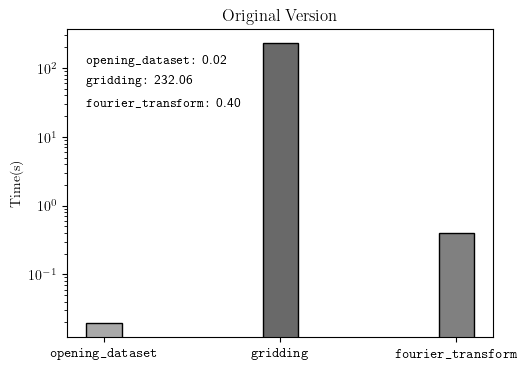

<Figure size 640x480 with 0 Axes>

In [9]:
%run python/plot.py original

From the benchmark above we see that the most time consuming and the bottleneck is the `gridding` function as we expected from the 3 nestes loops in python! For this reason we will focus our attention on the gridding function and will present the different results and strategies on that.

Here we put the benchamrking for the different version of the code, without any explicit parallelism by us (e.g. the benchmarks below are for the versions 1 to 5 without any multi-threading or use of MPI multi-processing)